## Visualization

Humans are visual creatures and have evolved to be able to quickly notice the meaning when info is presented in certain ways that cause the wiring in our brains to have the light bulb of insight turn on. This "aha" can often be performed very quickly, given the correct tools, instead of through tedious numerical analysis.

This part consists of three parts:

* General concepts of programming visualizations with pandas
* Many types of data visualizaiton commonly used in pandas programs, including: Bar plots, Histograms, Box and whisker charts, Area plots, Scatter plots, Density plots, Scatter plot matrixes, and Heatmaps.
* Divide plots into subparts

In [1]:
import numpy as np
import pandas as pd

# date and times
import datetime
from datetime import datetime

# random seed
seedval = 111111

import matplotlib as mpl
import matplotlib.pyplot as plt
# tells matplotlib to produce inline graphics.
%matplotlib inline

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

## Plotting basics


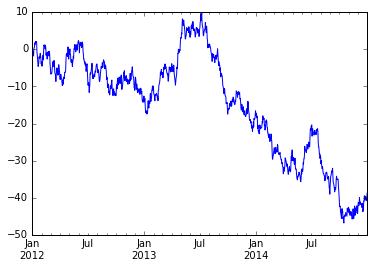

In [2]:
# generate a random walk time-series
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096), index=pd.date_range('2012-01-01', '2014-12-31'))
walk_ts = s.cumsum()
# use ; to suppress the generation of an IPython out tag, as well as the trace information.
walk_ts.plot();

In [3]:
# tells pandas plots to use a default style
# which has a background fill
# NOTE: the line has an error: AttributeError: Unknown property color_cycle
#pd.options.display.mpl_style = 'default'
#walk_ts.plot()

The `.plot()` method on pandas objects is a wrapper function around the matplotlib lib's `plot()` func. It makes plots of pandas data very easy to create.

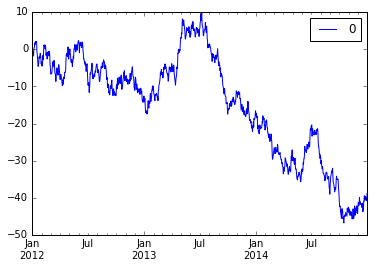

In [4]:
walk_ts = pd.DataFrame(walk_ts)
walk_ts.plot()

In [7]:
# generate two random walks
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2),
                  index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()

                   A         B
2012-01-01 -1.878324  1.362367
2012-01-02 -2.804186  1.427261
2012-01-03 -3.241758  3.165368
2012-01-04 -2.750550  3.332685
2012-01-05 -1.620667  2.930017

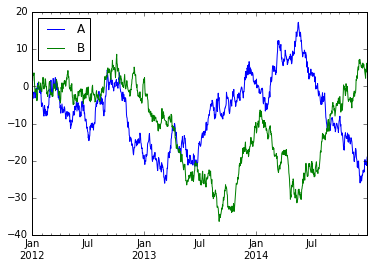

In [8]:
walk_df.plot();

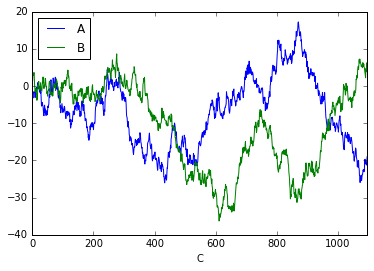

In [9]:
df2 = walk_df.copy()
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)
df2.plot(x='C', y=['A', 'B']);

## Adorning and styling your time-series plots


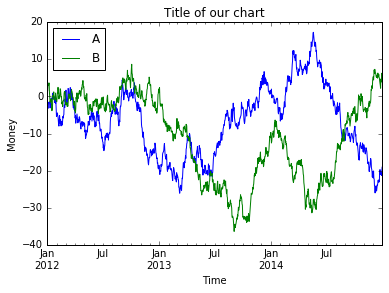

In [11]:
# adding a title and changing axes labels
walk_df.plot(title='Title of our chart')
plt.xlabel('Time')
plt.ylabel('Money');

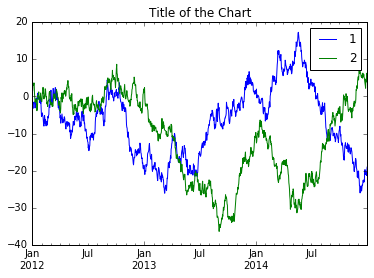

In [12]:
# legend content and position
# use AxesSubplot object
ax = walk_df.plot(title='Title of the Chart')
ax.legend(['1', '2']);

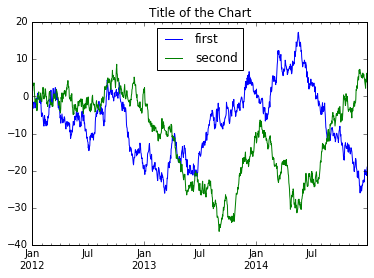

In [13]:
ax = walk_df.plot(title='Title of the Chart')
ax.legend(['first', 'second'], loc='upper center');

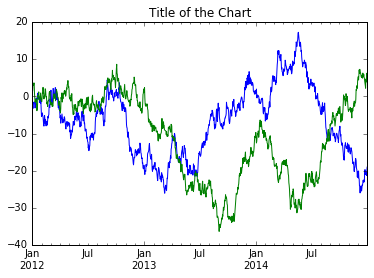

In [14]:
# turn off legend
ax = walk_df.plot(title='Title of the Chart', legend=False);

## Specifying line colors, styles, thickness, and markers


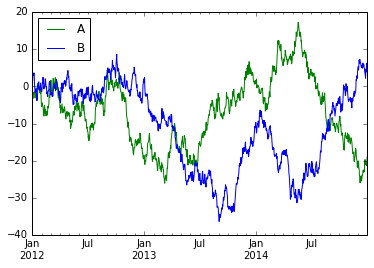

In [15]:
# color
walk_df.plot(style=['g', '#0000FF']);

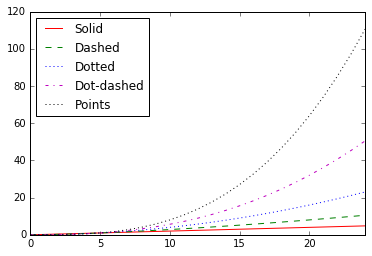

In [16]:
# line styles
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 'Dot-dashed', 'Points']
line_style = pd.DataFrame({0: t,
                           1: t**1.5,
                           2: t**2.0,
                           3: t**2.5,
                           4: t**3.0})
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])
ax.legend(legend_labels, loc='upper left');

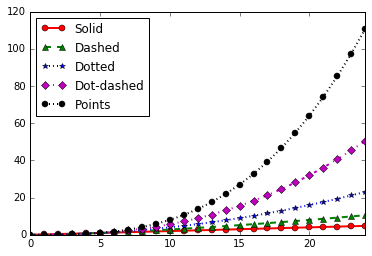

In [17]:
ax = line_style.plot(style=['r-o', 'g--^', 'b:*', 'm-.D', 'k:o'], lw=2)
ax.legend(legend_labels, loc='upper left');

## Common plots used in statistical analysis

**Bar plots** are useful in order to visualize the relative differences in values of non time-series data.

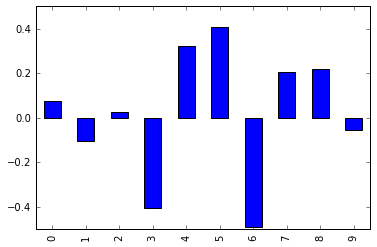

In [18]:
np.random.seed(seedval)
s = pd.Series(np.random.rand(10) - 0.5)
s.plot(kind='bar');

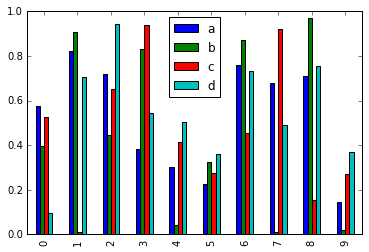

In [19]:
np.random.seed(seedval)
df2 = pd.DataFrame(np.random.rand(10, 4),
                   columns=list('abcd'))
df2.plot(kind='bar');

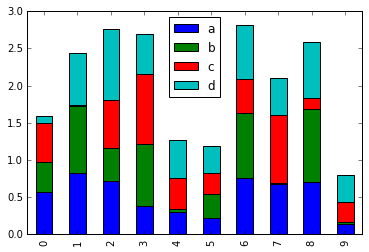

In [20]:
df2.plot(kind='bar', stacked=True);

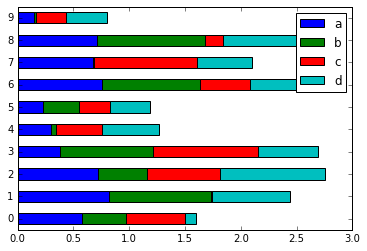

In [21]:
df2.plot(kind='barh', stacked=True);

**Histograms** are useful for visualizing distributions of data.

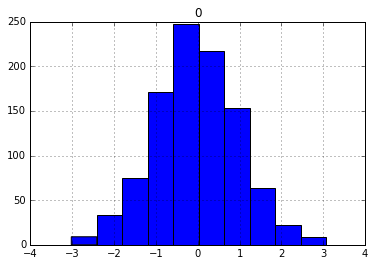

In [22]:
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000))
dfh.hist();

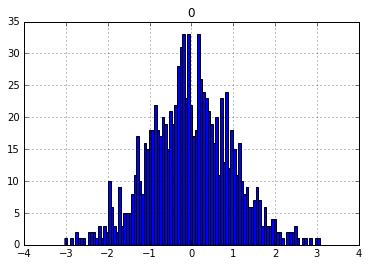

In [23]:
dfh.hist(bins=100);

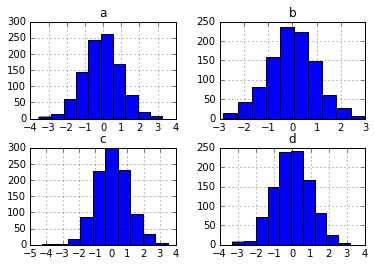

In [24]:
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000, 4),
                   columns=list('abcd'))
dfh.hist();

## Box and whisker charts


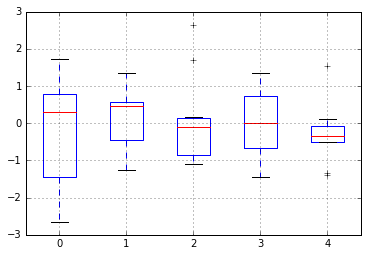

In [25]:
np.random.seed(seedval)
dfb = pd.DataFrame(np.random.randn(10, 5))
dfb.boxplot(return_type='axes');

## Area plots

**Area plots** are used to represent cumulative totals over time, to demonstrate the change in trends over time among related attributes.

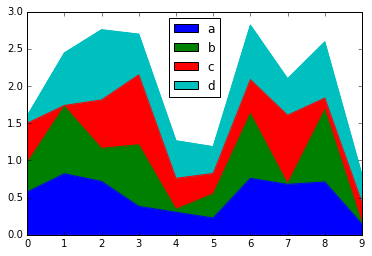

In [26]:
np.random.seed(seedval)
dfa = pd.DataFrame(np.random.rand(10, 4), columns=list('abcd'))
dfa.plot(kind='area');

## Scatter plots

A **scatter plot** displays the correlation between a pair of variables.

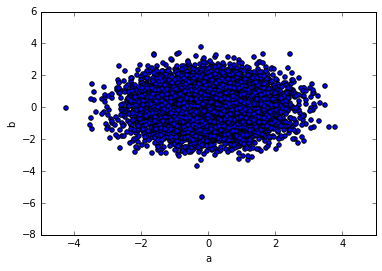

In [27]:
np.random.seed(seedval)
sp_df = pd.DataFrame(np.random.randn(10000, 2), columns=['a', 'b'])
sp_df.plot(kind='scatter', x='a', y='b');

## Density plot

A kernel density estimate plot makes an attempt and estimates the true distributino of the data, and hence smoothes it into a continous plot.

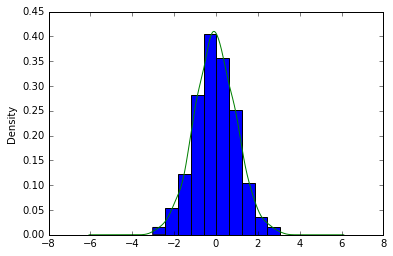

In [28]:
np.random.seed(seedval)
s = pd.Series(np.random.randn(1000))
s.hist(normed=True) # shows the bars
s.plot(kind='kde');

## The scatter plot matrix

A **scatter plot matrix** is a popular way of determining whether there is linear correlation between multiple vars.

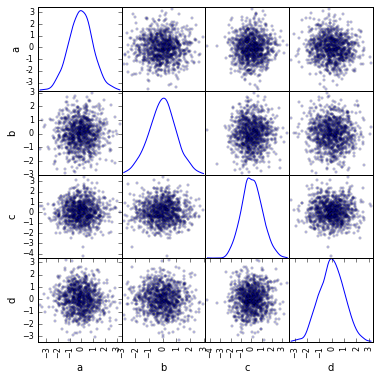

In [31]:
from pandas.tools.plotting import scatter_matrix

np.random.seed(111111)
df_spm = pd.DataFrame(np.random.randn(1000, 4), columns=list('abcd'))
scatter_matrix(df_spm, alpha=0.2, figsize=(6, 6), diagonal='kde');

A **heatmap** is a graphical representation of data, where values within a matrix are represented by colors. This is an effective means to show relationships of values that are measured at the intersection of two vars.

In [32]:
s = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4], list('VWXYZ'))
heatmpa_data = pd.DataFrame({'A': s + 0.0,
                             'B': s + 0.1,
                             'C': s + 0.2,
                             'D': s + 0.3,
                             'E': s + 0.4,
                             'F': s + 0.5,
                             'G': s + 0.6})
heatmpa_data

     A    B    C    D    E    F    G
V  0.0  0.1  0.2  0.3  0.4  0.5  0.6
W  0.1  0.2  0.3  0.4  0.5  0.6  0.7
X  0.2  0.3  0.4  0.5  0.6  0.7  0.8
Y  0.3  0.4  0.5  0.6  0.7  0.8  0.9
Z  0.4  0.5  0.6  0.7  0.8  0.9  1.0

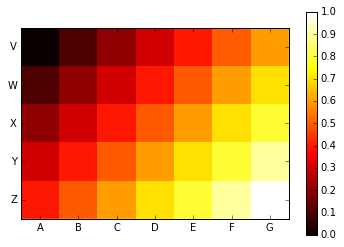

In [33]:
# generate the heatmap
plt.imshow(heatmpa_data, cmap='hot', interpolation='none')
plt.colorbar() # add the scale of colors bar
# set the labels
plt.xticks(range(len(heatmpa_data.columns)), heatmpa_data.columns)
plt.yticks(range(len(heatmpa_data)), heatmpa_data.index);

## Multiple plots in a single chart

It is often useful to contrast data by displaying mutiple plots next to each other.


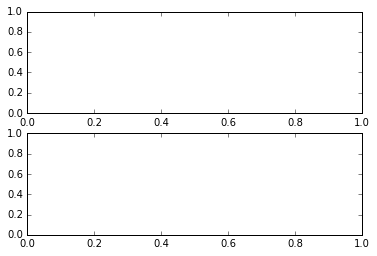

In [34]:
ax1 = plt.subplot2grid(shape=(2, 1), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 1), loc=(1, 0))

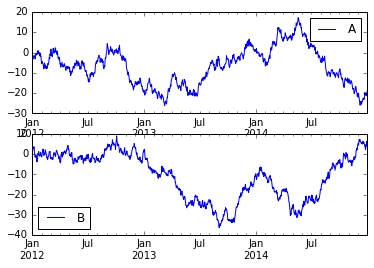

In [35]:
ax5 = plt.subplot2grid((2, 1), (0, 0))
ax6 = plt.subplot2grid((2, 1), (1, 0))
walk_df[[0]].plot(ax = ax5)
walk_df[[1]].plot(ax = ax6);